/tmp/ipython-input-260344324.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total", y="MUNICIPIO", data=ranking_2023, palette="Reds_d")


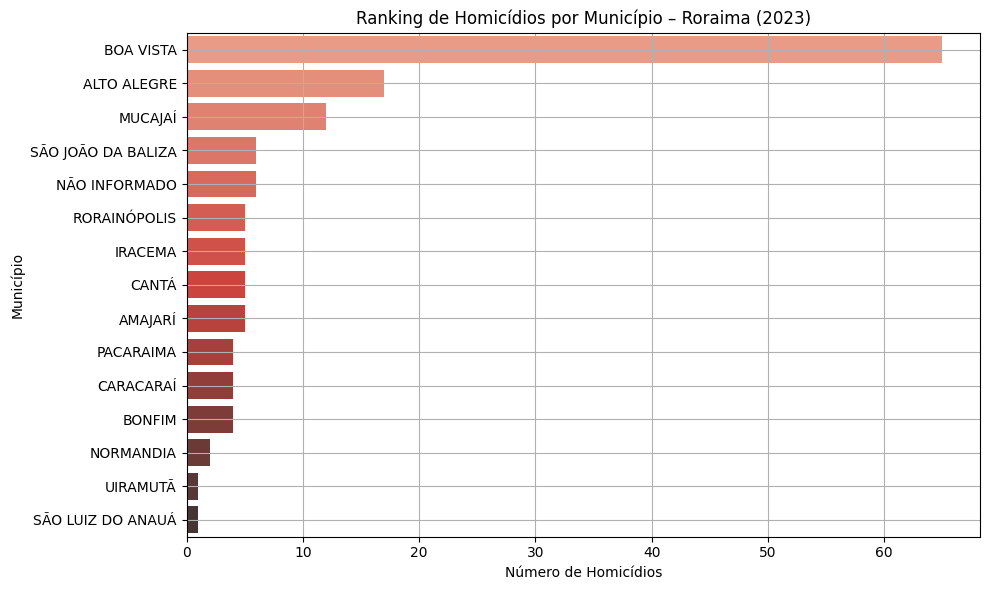

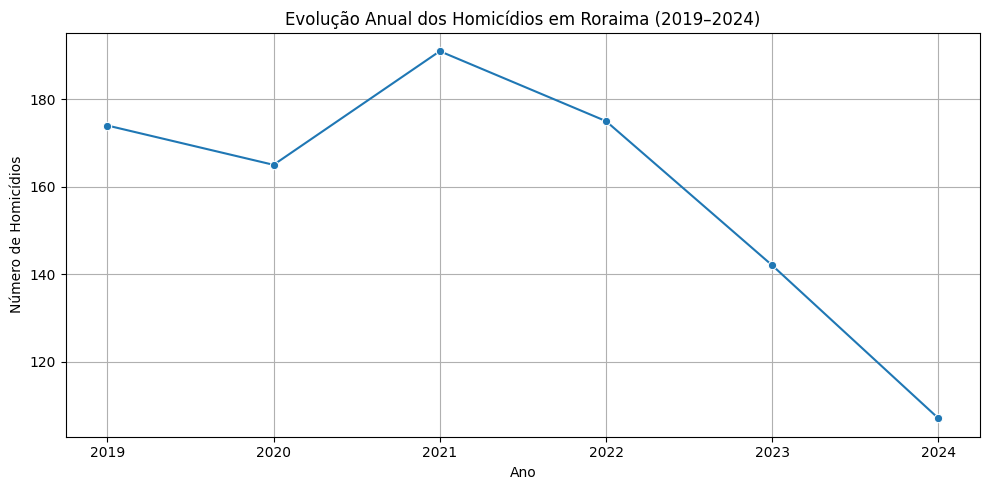

In [3]:
# ETAPA 1 – Importar bibliotecas
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# ETAPA 2 – Carregar o arquivo Excel com os dados da Polícia Civil de Roraima
arquivo = '/content/MORTES VIOLENTAS INTENCIONAIS - 2019 A 2024 OK.xlsx'


# ETAPA 3 – Ler a aba correta, pulando as 6 primeiras linhas
df = pd.read_excel(arquivo, sheet_name="BASE DE DADOS", skiprows=6)

# ETAPA 4 – Renomear e filtrar colunas relevantes
df.columns = [
    "ITEM", "MES", "ANO", "DATA_OCORRENCIA", "MUNICIPIO", "BAIRRO", "NACIONALIDADE",
    "SEXO", "RACA_COR", "INSTRUMENTO_MEIO", "CARACTERISTICA_ARMA", "TIPIFICACAO",
    "EXTRA1", "EXTRA2", "EXTRA3", "EXTRA4", "EXTRA5"
]

df = df[[
    "ANO", "DATA_OCORRENCIA", "MUNICIPIO", "SEXO", "RACA_COR",
    "INSTRUMENTO_MEIO", "TIPIFICACAO"
]].dropna(subset=["MUNICIPIO", "TIPIFICACAO"])

# ETAPA 5 – Criar banco SQLite e inserir os dados
conn = sqlite3.connect('seguranca_rr.db')
df.to_sql('ocorrencias', conn, if_exists='replace', index=False)

# ETAPA 6 – Consulta: Ranking de homicídios por município em 2023
query1 = """
SELECT MUNICIPIO, COUNT(*) AS total
FROM ocorrencias
WHERE TIPIFICACAO = 'HOMICÍDIO' AND ANO = 2023
GROUP BY MUNICIPIO
ORDER BY total DESC
"""
ranking_2023 = pd.read_sql_query(query1, conn)

# Gráfico 1: Ranking
plt.figure(figsize=(10, 6))
sns.barplot(x="total", y="MUNICIPIO", data=ranking_2023, palette="Reds_d")
plt.title("Ranking de Homicídios por Município – Roraima (2023)")
plt.xlabel("Número de Homicídios")
plt.ylabel("Município")
plt.grid(True)
plt.tight_layout()
plt.show()

# ETAPA 7 – Consulta: Evolução anual (2019–2024)
query2 = """
SELECT ANO, COUNT(*) AS total
FROM ocorrencias
WHERE TIPIFICACAO = 'HOMICÍDIO'
GROUP BY ANO
ORDER BY ANO
"""
homicidios_ano = pd.read_sql_query(query2, conn)

# Gráfico 2: Evolução anual
plt.figure(figsize=(10, 5))
sns.lineplot(data=homicidios_ano, x="ANO", y="total", marker="o")
plt.title("Evolução Anual dos Homicídios em Roraima (2019–2024)")
plt.xlabel("Ano")
plt.ylabel("Número de Homicídios")
plt.grid(True)
plt.tight_layout()
plt.show()
